In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Phoneme Dataset
Load the phoneme dataset using Pandas

In [27]:
data = pd.read_csv('data/phoneme.csv')
# print(data)

# TODO
# Split the dataset into a train and test dataset according to column "speaker".
# Be sure to exclude row number, "speaker" and response columns from your features.
train = data[data['speaker'].str.contains("train")]
test = data[data['speaker'].str.contains("test")]

y_train = train['g']
y_test = test['g']
X_train = train.drop(['g', 'row.names', 'speaker'], axis=1)
X_test = test.drop(['g', 'row.names', 'speaker'], axis=1)

### 2. LDA modelling
Fit an LDA model. Compute and report the train and test error.

In [28]:
# TODO
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)
print("Train score: ", lda_clf.score(X_train, y_train))

print("Test score: ", lda_clf.score(X_test, y_test))

Train score:  0.9440119760479042
Test score:  0.9195893926432849


### 3. LDA canonical coordinates
 Plot the projection of the training data onto the first two canonical coordinates of the LDA and report your findings. Investigate the data projected on further dimensions using the \texttt{dimen} parameter.

In [29]:
# TODO


### 4. LDA on "aa", "ao"
Select the two phonemes "aa" and "ao". Fit an LDA model on this data set and repeat the steps
    done in (2).

In [42]:
# TODO
aa_ao_train_indices = y_train.str.contains("aa|ao")
aa_ao_test_indices = y_test.str.contains("aa|ao")

y_train_aa_ao = y_train[aa_ao_train_indices]
X_train_aa_ao = X_train[aa_ao_train_indices]
y_test_aa_ao = y_test[aa_ao_test_indices]
X_test_aa_ao = X_test[aa_ao_test_indices]

lda_aa_ao_clf = LinearDiscriminantAnalysis()
lda_aa_ao_clf.fit(X_train_aa_ao, y_train_aa_ao)
print("Train score: ", lda_aa_ao_clf.score(X_train_aa_ao, y_train_aa_ao))

print("Test score: ", lda_aa_ao_clf.score(X_test_aa_ao, y_test_aa_ao))

Train score:  0.8935837245696401
Test score:  0.785876993166287


## 5. QDA
Repeat steps (b) and (d) using QDA and report your findings. Would you prefer LDA or QDA in this example? Why?

In [31]:
# TODO
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train, y_train)
print("Train score: ", qda_clf.score(X_train, y_train))

print("Test score: ", qda_clf.score(X_test, y_test))

Train score:  1.0
Test score:  0.8417450812660393


In [44]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train, y_train)
print("Train score: ", qda_clf.score(X_train, y_train))

print("Test score: ", qda_clf.score(X_test, y_test))

Train score:  1.0
Test score:  0.8417450812660393


In [43]:
qda_aa_ao_clf = QuadraticDiscriminantAnalysis()
qda_aa_ao_clf.fit(X_train_aa_ao, y_train_aa_ao)
print("Train score: ", qda_aa_ao_clf.score(X_train_aa_ao, y_train_aa_ao))

print("Test score: ", qda_aa_ao_clf.score(X_test_aa_ao, y_test_aa_ao))

Train score:  1.0
Test score:  0.6605922551252847


##### Answer
We would prefer LDA over QDA because it generalized better on the testing set
The QDA overfit a bit when it achieved 100% train set score then performed worse on the test set.

## 6. Confusion Matrices
Generate confusion matrices for the LDA and QDA model for "aa" and "ao". Which differences can you observe between the models?

<AxesSubplot: >

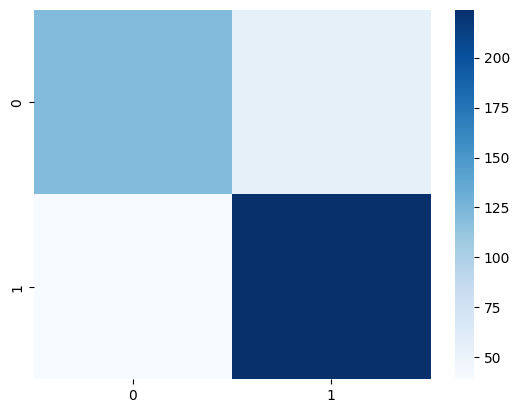

In [56]:
# TODO
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test_aa_ao, y_pred = lda_aa_ao_clf.predict(X_test_aa_ao)), cmap="Blues")

<AxesSubplot: >

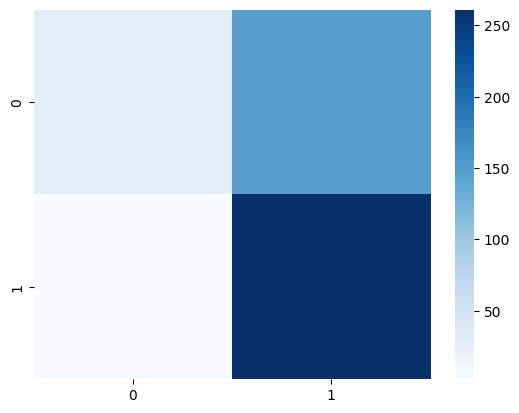

In [57]:
sns.heatmap(confusion_matrix(y_test_aa_ao, y_pred = qda_aa_ao_clf.predict(X_test_aa_ao)), cmap="Blues")

##### Observations
The QDA model overfit and was unable to separate the classes correctly which can be clearly seen in the confusion matrix
Whereas, the LDA model performed well with the diagonal being dark and the 2nd diagonal being light